# Análise de Dados Eleitorais da Eleição para Presidente da República de 2022, na cidade de São José dos Campos

<details>
<summary>Dataset Escolhido</summary>

- Os dados aqui analisados foram retirados do repositório oficial do TSE (Tribunal Superior Eleitoral), no link: https://dadosabertos.tse.jus.br/dataset/resultados-2022/resource

- Trata-se dos datasets com o histórico totalizado de votos e perfil do eleitorado nas eleições de 2022 para a Unidade Federal de São Paulo.
</details>

### Preparação do Ambiente

In [ ]:
pip install pandas matplotlib jupyter numpy

### Carregando os Datasets em Dataframes Pandas

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_eleitor_sp = pd.read_csv(r"C:\Users\felip\OneDrive\Documentos\NoSQL\~API\datasets-masanori\perfil_eleitor_secao_2022_SP\perfil_eleitor_secao_2022_SP.csv", 
                 usecols='''NR_ZONA NR_SECAO NM_MUNICIPIO DS_FAIXA_ETARIA DS_ESTADO_CIVIL DS_GRAU_ESCOLARIDADE 
                 QT_ELEITORES_INC_NM_SOCIAL QT_ELEITORES_PERFIL'''.split(),
                 sep=";", on_bad_lines = 'skip', encoding='Latin 1'
                )

df_eleitor_sjc = df_eleitor_sp.query('NM_MUNICIPIO == "SÃO JOSÉ DOS CAMPOS"')
df_eleitor_sjc = df_eleitor_sjc.drop(columns = 'NM_MUNICIPIO')

df_eleitor_sjc.sample(5)

,NR_ZONA,NR_SECAO,DS_ESTADO_CIVIL,DS_FAIXA_ETARIA,DS_GRAU_ESCOLARIDADE,QT_ELEITORES_PERFIL,QT_ELEITORES_INC_NM_SOCIAL
13815951,412,259,CASADO,60 a 64 anos,SUPERIOR COMPLETO,2,0
6205013,127,520,SOLTEIRO,50 a 54 anos,ENSINO FUNDAMENTAL COMPLETO,1,0
6712791,127,542,CASADO,30 a 34 anos,SUPERIOR INCOMPLETO,1,0
6725251,127,547,SOLTEIRO,16 anos,ENSINO MÉDIO INCOMPLETO,2,0
5201623,282,91,VIÚVO,60 a 64 anos,SUPERIOR COMPLETO,1,0


In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_bweb_sp = pd.read_csv(r"C:\Users\felip\OneDrive\Documentos\NoSQL\~API\datasets-masanori\bweb_1t_SP_051020221321\bweb_1t_SP_051020221321.csv", 
                 usecols='''NR_ZONA NR_SECAO NM_MUNICIPIO QT_COMPARECIMENTO QT_APTOS QT_COMPARECIMENTO 
                 QT_ABSTENCOES NR_VOTAVEL NM_VOTAVEL QT_VOTOS DS_CARGO_PERGUNTA'''.split(),
                 sep=";", on_bad_lines = 'skip', encoding='Latin 1'
                )

df_bweb_sjc = df_bweb_sp.query('NM_MUNICIPIO == "SÃO JOSÉ DOS CAMPOS"')
df_bweb_sjc = df_bweb_sjc.drop(columns = 'NM_MUNICIPIO')

df_bweb_sjc.sample(5)

,NR_ZONA,NR_SECAO,DS_CARGO_PERGUNTA,QT_APTOS,QT_COMPARECIMENTO,QT_ABSTENCOES,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS
18114029,412,115,Deputado Estadual,347,255,92,55400,MARTA COSTA,3
10577603,282,16,Deputado Estadual,273,194,79,22,PL,3
18114922,412,120,Deputado Federal,396,295,101,1112,SARGENTO NANTES,1
18056645,411,219,Deputado Estadual,382,322,60,13,PT,9
18146270,412,275,Deputado Federal,414,330,84,3077,MONICA ROSENBERG,1


### *1. Jornalista quer saber a classificação do eleitorado a partir do estado civil, escolaridade e faixa etária, além da quantidade de eleitores que utilizam nome social"* 

#### 1.1. Dados Relevantes:
Com base nos dados fornecidos, as seguintes colunas no dataset de **Perfil do Eleitorado** serão úteis:

- **Estado civil**: 

  - Coluna: `DS_ESTADO_CIVIL`

- **Escolaridade**: 

  - Coluna: `DS_GRAU_ESCOLARIDADE`

- **Faixa etária**: 

  - Coluna: `DS_FAIXA_ETARIA`

- **Nome social**:

  - Coluna: `QT_ELEITORES_INC_NM_SOCIAL`
  

In [84]:
# Agrupando pelo estado civil, escolaridade e faixa etária e somando o total de eleitores
agrupamento = df_eleitor_sjc.groupby(['DS_ESTADO_CIVIL', 'DS_GRAU_ESCOLARIDADE', 'DS_FAIXA_ETARIA'])['QT_ELEITORES_PERFIL'].sum().reset_index()

# Exibindo a tabela com as classificações do eleitorado
print('Classificação do Eleitorado:')
display(agrupamento)

# Total de eleitores que utilizam nome social
print('\n----------\n')
total_nome_social = df_eleitor_sjc['QT_ELEITORES_INC_NM_SOCIAL'].sum()

print(f'Total de eleitores que utilizam nome social: {total_nome_social}')

Classificação do Eleitorado:


,DS_ESTADO_CIVIL,DS_GRAU_ESCOLARIDADE,DS_FAIXA_ETARIA,QT_ELEITORES_PERFIL
0,CASADO,ANALFABETO,100 anos ou mais,55
1,CASADO,ANALFABETO,25 a 29 anos,2
2,CASADO,ANALFABETO,30 a 34 anos,8
3,CASADO,ANALFABETO,35 a 39 anos,11
4,CASADO,ANALFABETO,40 a 44 anos,43
...,...,...,...,...
712,VIÚVO,SUPERIOR INCOMPLETO,75 a 79 anos,31
713,VIÚVO,SUPERIOR INCOMPLETO,80 a 84 anos,10
714,VIÚVO,SUPERIOR INCOMPLETO,85 a 89 anos,5
715,VIÚVO,SUPERIOR INCOMPLETO,90 a 94 anos,3



----------

Total de eleitores que utilizam nome social: 121


- **Agrupamento**: Agrupa os eleitores por estado civil, grau de escolaridade e faixa etária usando as colunas identificadas nos dicionários dos datasets. Em seguida, soma o número total de eleitores para cada grupo usando a coluna `QT_ELEITORES_PERFIL`.

- **Eleitores com nome social**: Calculamos o total de eleitores que solicitaram a inclusão de nome social com a coluna `QT_ELEITORES_INC_NM_SOCIAL`.

#### Insights

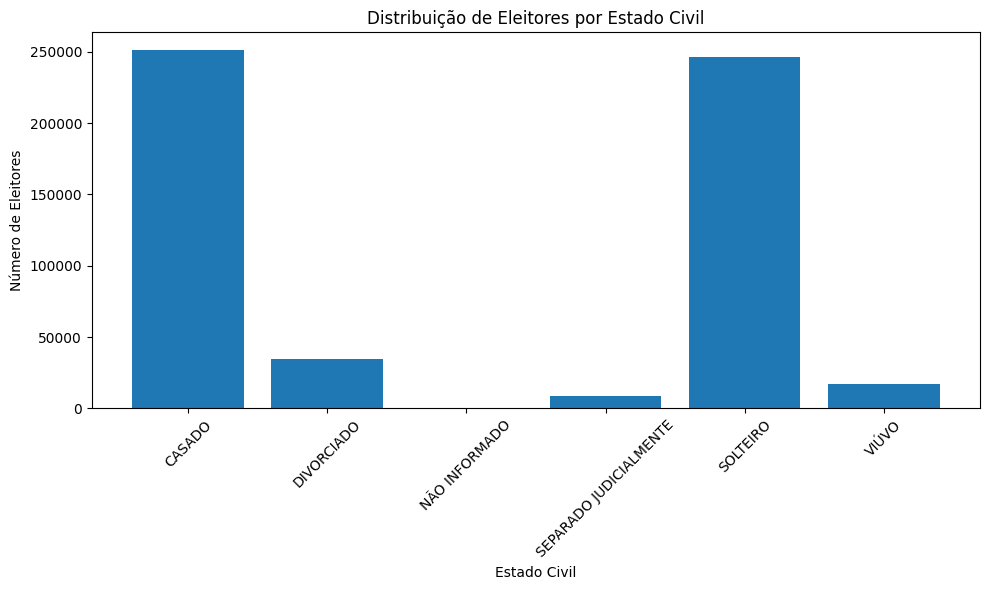

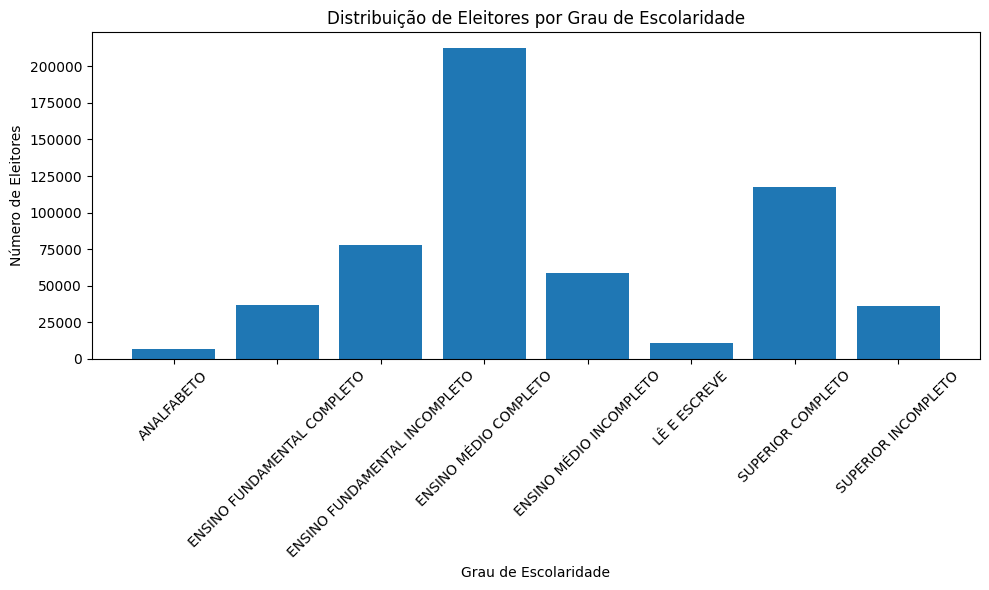

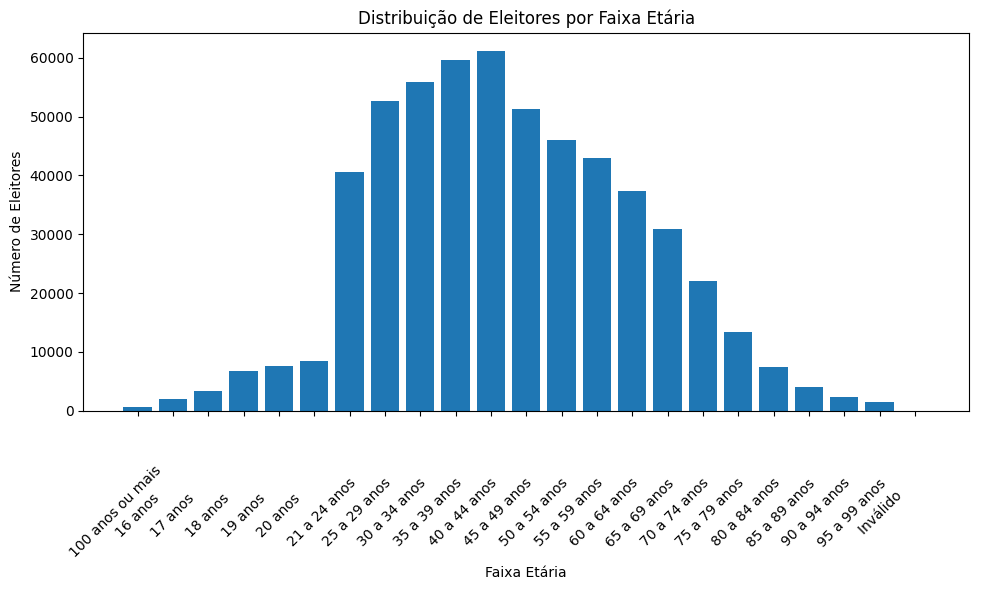


Porcentagem de eleitores que utilizam nome social: 0.022%


In [85]:
# 1. Visualização Gráfica (Gráficos de Barras)
# Criando gráficos de barras para visualizar a distribuição por estado civil, escolaridade e faixa etária

# Gráfico 1: Estado Civil

agrupamento_estado_civil = df_eleitor_sjc.groupby('DS_ESTADO_CIVIL')['QT_ELEITORES_PERFIL'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(agrupamento_estado_civil['DS_ESTADO_CIVIL'], agrupamento_estado_civil['QT_ELEITORES_PERFIL'])
plt.title('Distribuição de Eleitores por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Número de Eleitores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico 2: Grau de Escolaridade

agrupamento_escolaridade = df_eleitor_sjc.groupby('DS_GRAU_ESCOLARIDADE')['QT_ELEITORES_PERFIL'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(agrupamento_escolaridade['DS_GRAU_ESCOLARIDADE'], agrupamento_escolaridade['QT_ELEITORES_PERFIL'])
plt.title('Distribuição de Eleitores por Grau de Escolaridade')
plt.xlabel('Grau de Escolaridade')
plt.ylabel('Número de Eleitores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico 3: Faixa Etária

agrupamento_faixa_etaria = df_eleitor_sjc.groupby('DS_FAIXA_ETARIA')['QT_ELEITORES_PERFIL'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(agrupamento_faixa_etaria['DS_FAIXA_ETARIA'], agrupamento_faixa_etaria['QT_ELEITORES_PERFIL'])
plt.title('Distribuição de Eleitores por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Eleitores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Cálculo da porcentagem de eleitores que utilizam nome social em relação ao total de eleitores

total_nome_social = df_eleitor_sjc['QT_ELEITORES_INC_NM_SOCIAL'].sum()

total_eleitores = df_eleitor_sjc['QT_ELEITORES_PERFIL'].sum()

porcentagem_nome_social = (total_nome_social / total_eleitores) * 100

# Exibindo a porcentagem
print(f'\nPorcentagem de eleitores que utilizam nome social: {porcentagem_nome_social:.3f}%')

### *2. Jornalista quer relacionar as características do eleitorado de acordo com o representante eleito em determinada região* 	

#### Dados Relevantes:

- No dataset de **Boletim de Urna**:

  - `NR_TURNO`: Número do turno (1º ou 2º turno).

  - `DS_CARGO_PERGUNTA`: Deve ser "Presidente" para filtrar os resultados da eleição presidencial.

  - `NM_VOTAVEL`: Nome do candidato (representante) votado.

  - `QT_VOTOS`: Quantidade de votos que o candidato recebeu por seção.

  - `NM_MUNICIPIO`: Nome do município, para filtrar por São José dos Campos.


- No dataset de **Perfil do Eleitorado**:

  - Colunas já usadas anteriormente para classificação do eleitorado (estado civil, escolaridade, faixa etária).

  - `QT_ELEITORES_PERFIL`: Quantidade de eleitores em cada grupo.
  

In [86]:
# Filtrando os dados de São José dos Campos para o cargo de Presidente
df_presidente_sjc = df_bweb_sjc[df_bweb_sjc['DS_CARGO_PERGUNTA'] == 'Presidente']

# Agrupando os votos por candidato
votos_por_candidato = df_presidente_sjc.groupby(['NM_VOTAVEL'])['QT_VOTOS'].sum().reset_index()

# Exibindo os resultados dos candidatos em São José dos Campos
print("Votos por candidato em SJC:")
display(votos_por_candidato)

# Relacionando com as características do eleitorado
# Agrupando o eleitorado por estado civil, escolaridade e faixa etária
eleitorado_sjc = df_eleitor_sjc.groupby(['DS_ESTADO_CIVIL', 'DS_GRAU_ESCOLARIDADE', 'DS_FAIXA_ETARIA'])['QT_ELEITORES_PERFIL'].sum().reset_index()

Votos por candidato em SJC:


,NM_VOTAVEL,QT_VOTOS
0,Branco,7745
1,CIRO GOMES,14177
2,CONSTITUINTE EYMAEL,84
3,FELIPE D'AVILA,4513
4,JAIR BOLSONARO,233683
5,LULA,143732
6,LÉO PÉRICLES,301
7,Nulo,11572
8,PADRE KELMON,263
9,SIMONE TEBET,28467


- **Filtragem por município e cargo**: O código filtra os dados de São José dos Campos (`NM_MUNICIPIO`) e apenas para o cargo de **Presidente** (`DS_CARGO_PERGUNTA`).

- **Agrupamento de votos**: Agrupa os votos por candidato (`NM_VOTAVEL`) e por turno (`NR_TURNO`), somando a quantidade de votos (`QT_VOTOS`).

- **Relatório do perfil do eleitorado**: O eleitorado é agrupado pelas suas características demográficas (estado civil, escolaridade e faixa etária), o que pode ser comparado com os resultados eleitorais.

#### Próximos passos:

- **Identificar o candidato com mais votos**: Já se tem conhecimento da quantidade de votos que cada candidato recebeu em São José dos Campos no 1º turno.

- **Relacionar as características do eleitorado com o candidato vencedor no 1º turno**: O próximo passo é fazer essa relação entre as características do eleitorado de SJC e o candidato que recebeu mais votos.

- **Visualizações gráficas**: Gerar gráficos que ilustrem as comparações e a distribuição de votos para tornar as conclusões mais claras e visuais.


Candidato mais votado:


NM_VOTAVEL    JAIR BOLSONARO
QT_VOTOS              233683
Name: 4, dtype: object

Nome do candidato com mais votos em SJC no 1º Turno: "JAIR BOLSONARO"



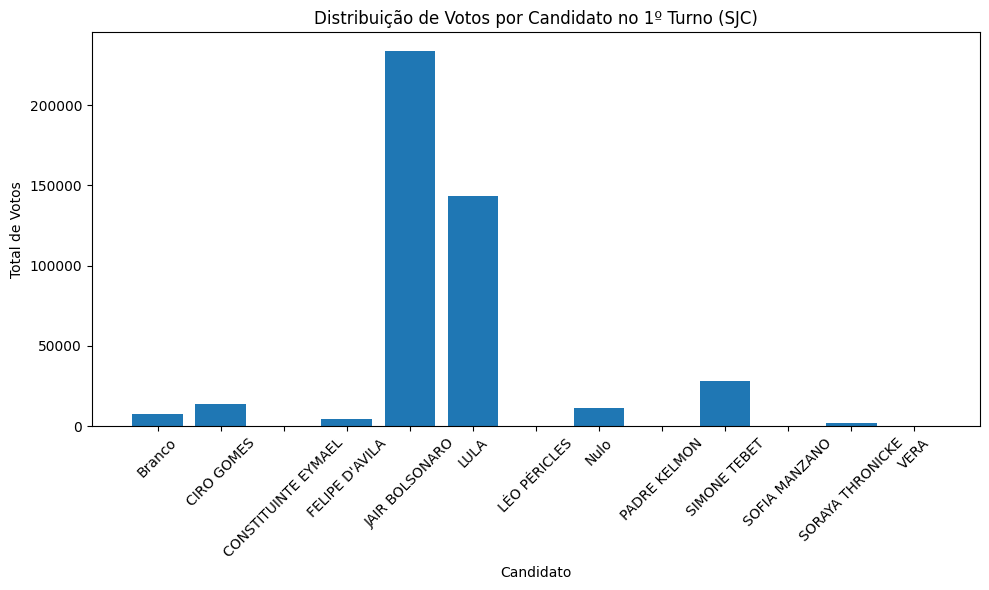

Perfil do Eleitorado do Bolsonaro em JSC: 


,DS_ESTADO_CIVIL,DS_GRAU_ESCOLARIDADE,DS_FAIXA_ETARIA,eleitores_bolsonaro
0,CASADO,ANALFABETO,100 anos ou mais,20
1,CASADO,ANALFABETO,25 a 29 anos,0
2,CASADO,ANALFABETO,30 a 34 anos,2
3,CASADO,ANALFABETO,35 a 39 anos,4
4,CASADO,ANALFABETO,40 a 44 anos,17
...,...,...,...,...
712,VIÚVO,SUPERIOR INCOMPLETO,75 a 79 anos,12
713,VIÚVO,SUPERIOR INCOMPLETO,80 a 84 anos,4
714,VIÚVO,SUPERIOR INCOMPLETO,85 a 89 anos,2
715,VIÚVO,SUPERIOR INCOMPLETO,90 a 94 anos,1


In [87]:
# Identificando o candidato com mais votos no 1º turno em São José dos Campos
candidato_mais_votado = votos_por_candidato.loc[votos_por_candidato['QT_VOTOS'].idxmax()]
print(f'Candidato mais votado:')
display(candidato_mais_votado)

# Candidato mais votado
candidato_mais_votado_nome = candidato_mais_votado['NM_VOTAVEL']
print(f'Nome do candidato com mais votos em SJC no 1º Turno: "{candidato_mais_votado_nome}"\n')

# Visualizando as características do eleitorado de São José dos Campos e gerando gráficos de comparação

# Gerando visualizações para comparação entre os candidatos
plt.figure(figsize=(10, 6))
plt.bar(votos_por_candidato['NM_VOTAVEL'], votos_por_candidato['QT_VOTOS'])
plt.title('Distribuição de Votos por Candidato no 1º Turno (SJC)')
plt.xlabel('Candidato')
plt.ylabel('Total de Votos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Filtrando os votos para Jair Bolsonaro no 1º turno em São José dos Campos
df_bolsonaro = df_bweb_sjc[df_bweb_sjc['NM_VOTAVEL'] == 'JAIR BOLSONARO']

# Agrupando os votos de Jair Bolsonaro por zona e seção
votos_bolsonaro_secoes = df_bolsonaro.groupby(['NR_ZONA', 'NR_SECAO'])['QT_VOTOS'].sum().reset_index()

# Calculando o total de eleitores em cada zona/seção
total_eleitores_secoes = df_eleitor_sjc.groupby(['NR_ZONA', 'NR_SECAO'])['QT_ELEITORES_PERFIL'].sum().reset_index()

# Fazendo merge dos votos de Bolsonaro com o total de eleitores por zona/seção
df_merge = pd.merge(votos_bolsonaro_secoes, total_eleitores_secoes, on=['NR_ZONA', 'NR_SECAO'])

# Calculando a proporção de votos para Bolsonaro em cada zona/seção
df_merge['proporcao_bolsonaro'] = df_merge['QT_VOTOS'] / df_merge['QT_ELEITORES_PERFIL']

# Aplicando essa proporção ao perfil demográfico de eleitores em cada seção
df_merge_final = pd.merge(df_merge, df_eleitor_sjc, on=['NR_ZONA', 'NR_SECAO'])

# Ajustando o número de eleitores para Jair Bolsonaro proporcionalmente
df_merge_final['eleitores_bolsonaro'] = df_merge_final['proporcao_bolsonaro'] * df_merge_final['QT_ELEITORES_PERFIL_y']

# Agrupando os resultados pelo perfil demográfico
perfil_eleitorado_agrupado = df_merge_final.groupby(['DS_ESTADO_CIVIL', 'DS_GRAU_ESCOLARIDADE', 'DS_FAIXA_ETARIA'])['eleitores_bolsonaro'].sum().reset_index()
perfil_eleitorado_agrupado['eleitores_bolsonaro'] = perfil_eleitorado_agrupado['eleitores_bolsonaro'].astype(int)

# Exibindo o resultado
print("Perfil do Eleitorado do Bolsonaro em JSC: ")
display(perfil_eleitorado_agrupado)

#### Insights

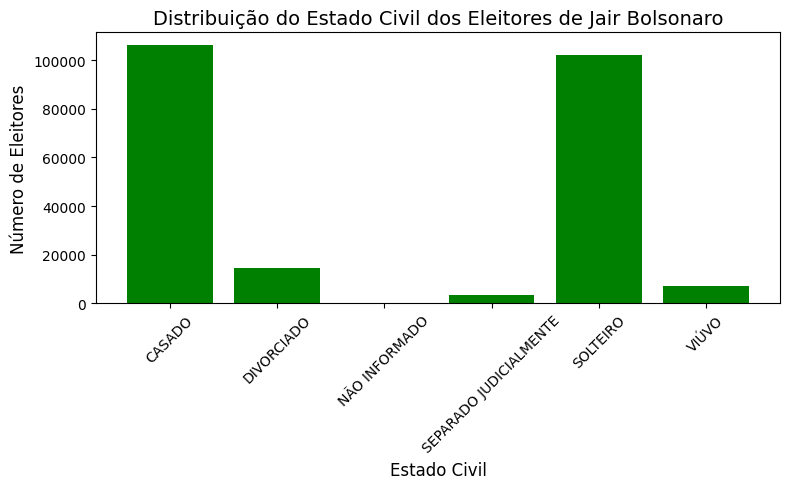

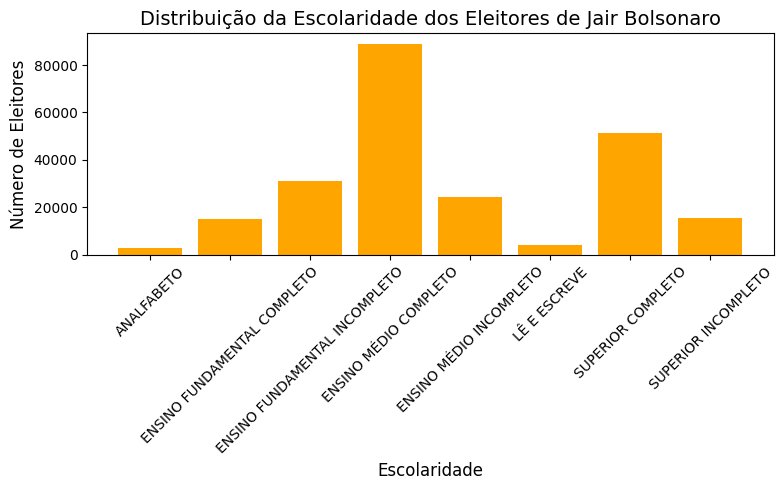

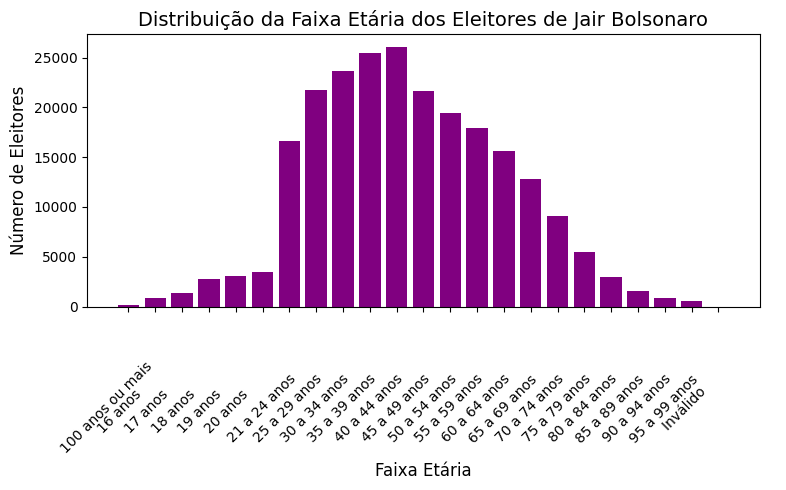

In [75]:
# Gráfico 2: Distribuição do Estado Civil dos Eleitores de Jair Bolsonaro
estado_civil = perfil_eleitorado_agrupado.groupby('DS_ESTADO_CIVIL')['eleitores_bolsonaro'].sum().reset_index()

plt.figure(figsize=(8, 5))
plt.bar(estado_civil['DS_ESTADO_CIVIL'], estado_civil['eleitores_bolsonaro'], color='green')
plt.title('Distribuição do Estado Civil dos Eleitores de Jair Bolsonaro', fontsize=14)
plt.xlabel('Estado Civil', fontsize=12)
plt.ylabel('Número de Eleitores', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico 3: Distribuição da Escolaridade dos Eleitores de Jair Bolsonaro
escolaridade = perfil_eleitorado_agrupado.groupby('DS_GRAU_ESCOLARIDADE')['eleitores_bolsonaro'].sum().reset_index()

plt.figure(figsize=(8, 5))
plt.bar(escolaridade['DS_GRAU_ESCOLARIDADE'], escolaridade['eleitores_bolsonaro'], color='orange')
plt.title('Distribuição da Escolaridade dos Eleitores de Jair Bolsonaro', fontsize=14)
plt.xlabel('Escolaridade', fontsize=12)
plt.ylabel('Número de Eleitores', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico 4: Distribuição da Faixa Etária dos Eleitores de Jair Bolsonaro
faixa_etaria = perfil_eleitorado_agrupado.groupby('DS_FAIXA_ETARIA')['eleitores_bolsonaro'].sum().reset_index()

plt.figure(figsize=(8, 5))
plt.bar(faixa_etaria['DS_FAIXA_ETARIA'], faixa_etaria['eleitores_bolsonaro'], color='purple')
plt.title('Distribuição da Faixa Etária dos Eleitores de Jair Bolsonaro', fontsize=14)
plt.xlabel('Faixa Etária', fontsize=12)
plt.ylabel('Número de Eleitores', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### *3. Jornalista quer saber a renda média do eleitorado de determinada região*

Para responder à pergunta sobre a renda média do eleitorado em determinada região, é necessário utilizar as informações do dataset de **Perfil do Eleitorado**. No entanto, de acordo com o dicionário de dados desses datasets analisados, o **perfil do eleitorado** não contém uma coluna diretamente relacionada à **renda**. Em vez disso, será usado a **escolaridade** dos eleitores como um indicativo aproximado de renda, pois há uma correlação clara entre níveis de escolaridade e renda média.

- **Escolaridade como indicativo aproximado de renda**: Será utilizado a coluna de **grau de escolaridade** do eleitorado (`DS_GRAU_ESCOLARIDADE`) e atribuiremos valores de renda média para cada nível de escolaridade, baseados em *dados externos que associam níveis de escolaridade à renda*.

#### Tabela de renda por escolaridade:

Tabela aproximada de renda com base nos níveis de escolaridade:

- **Analfabeto ou `LÊ E ESCREVE`:** R$ 1.200,00

- **Fundamental incompleto:** R$ 1.500,00

- **Fundamental completo:** R$ 1.800,00

- **Médio incompleto:** R$ 2.000,00

- **Médio completo:** R$ 2.500,00

- **Superior incompleto:** R$ 3.000,00

- **Superior completo:** R$ 4.500,00


In [88]:
print(df_eleitor_sjc['DS_GRAU_ESCOLARIDADE'].unique())

['ENSINO FUNDAMENTAL INCOMPLETO' 'ENSINO MÉDIO INCOMPLETO' 'LÊ E ESCREVE'
 'SUPERIOR COMPLETO' 'ENSINO MÉDIO COMPLETO' 'ANALFABETO'
 'ENSINO FUNDAMENTAL COMPLETO' 'SUPERIOR INCOMPLETO']


In [89]:
# Definindo a tabela de renda média por grau de escolaridade
renda_por_escolaridade = {
    'ANALFABETO': 1200,
    'LÊ E ESCREVE': 1200,
    'ENSINO FUNDAMENTAL INCOMPLETO': 1500,
    'ENSINO FUNDAMENTAL COMPLETO': 1800,
    'ENSINO MÉDIO INCOMPLETO': 2000,
    'ENSINO MÉDIO COMPLETO': 2500,
    'SUPERIOR INCOMPLETO': 3000,
    'SUPERIOR COMPLETO': 4500
}

# Adicionando a coluna de renda ao DataFrame do eleitorado
df_eleitor_sjc['RENDA_ESTIMADA'] = df_eleitor_sjc['DS_GRAU_ESCOLARIDADE'].map(renda_por_escolaridade)

# Calculando a média ponderada da renda, considerando o número de eleitores em cada grupo
renda_media = (df_eleitor_sjc['RENDA_ESTIMADA'] * df_eleitor_sjc['QT_ELEITORES_PERFIL']).sum() / df_eleitor_sjc['QT_ELEITORES_PERFIL'].sum()

print(f"A renda média estimada do eleitorado em São José dos Campos é: R$ {renda_media:.2f}")

A renda média estimada do eleitorado em São José dos Campos é: R$ 2674.48


- **Mapeamento da escolaridade para renda**: Foi associado cada nível de escolaridade a uma renda média estimada.

- **Média ponderada**: Foi calculado a **renda média estimada** ponderada pelo número de eleitores em cada grupo de escolaridade (`QT_ELEITORES_PERFIL`), somando as rendas de todos os grupos e dividindo pelo total de eleitores.

#### Insights

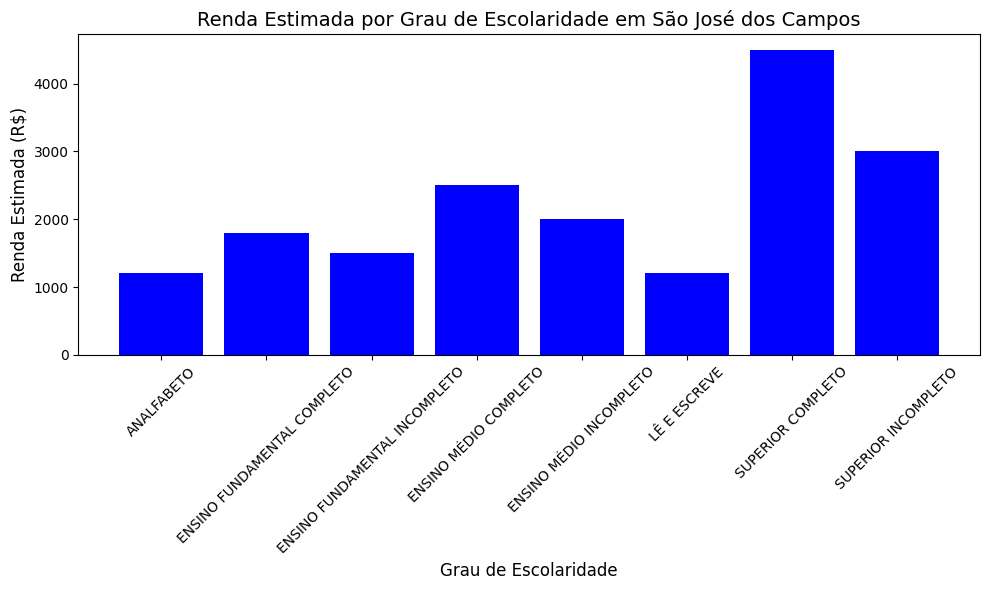

In [90]:
# Agrupando os dados por grau de escolaridade e somando o número de eleitores em cada grupo
agrupamento_renda = df_eleitor_sjc.groupby('DS_GRAU_ESCOLARIDADE').agg(
    renda_total=('RENDA_ESTIMADA', 'mean'),  # Renda estimada média
    eleitores=('QT_ELEITORES_PERFIL', 'sum')  # Total de eleitores em cada grupo
).reset_index()

# Gerando gráfico que mostra a distribuição da renda estimada por escolaridade, o que vai ilustrar a relação entre os níveis de escolaridade e a renda média associada
plt.figure(figsize=(10, 6))
plt.bar(agrupamento_renda['DS_GRAU_ESCOLARIDADE'], agrupamento_renda['renda_total'], color='blue')
plt.title('Renda Estimada por Grau de Escolaridade em São José dos Campos', fontsize=14)
plt.xlabel('Grau de Escolaridade', fontsize=12)
plt.ylabel('Renda Estimada (R$)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Exibindo o gráfico
plt.show()

### *4. Jornalista quer saber, daquela região, a cidade com mais eleitores jovens e mais eleitores idosos*

Para determinar quais cidades da região (no caso, do Vale do Paraíba) têm mais eleitores jovens e mais eleitores idosos, será utilizado as colunas de **faixa etária** presentes no dataset de **Perfil do Eleitorado**. Segundo o dicionário de dados:

- A coluna **DS_FAIXA_ETARIA** contém a descrição das faixas etárias dos eleitores.

#### Definição das faixas etárias de "jovens" e "idosos"

- **Eleitores jovens**: Normalmente definidos como aqueles na faixa etária de 16 a 29 anos.

- **Eleitores idosos**: Definidos como aqueles acima de 60 anos.


In [92]:
print(df_eleitor_sp['DS_FAIXA_ETARIA'].unique())

['50 a 54 anos                  ' '55 a 59 anos                  '
 '60 a 64 anos                  ' '65 a 69 anos                  '
 '70 a 74 anos                  ' '75 a 79 anos                  '
 '90 a 94 anos                  ' '35 a 39 anos                  '
 '40 a 44 anos                  ' '17 anos                       '
 '19 anos                       ' '20 anos                       '
 '21 a 24 anos                  ' '25 a 29 anos                  '
 '30 a 34 anos                  ' '45 a 49 anos                  '
 '80 a 84 anos                  ' '85 a 89 anos                  '
 '95 a 99 anos                  ' '100 anos ou mais              '
 '18 anos                       ' '16 anos                       '
 'Inválido                      ']


In [94]:
# Lista de municípios do Vale do Paraíba
municipios_vale = [
    'SÃO JOSÉ DOS CAMPOS', 'TAUBATÉ', 'JACAREÍ', 'GUARATINGUETÁ', 
    'PINDAMONHANGABA', 'LORENA', 'CAÇAPAVA', 'CRUZEIRO', 
    'CACHOEIRA PAULISTA', 'APARECIDA', 'IGARATÁ', 'JAMBEIRO', 
    'MONTEIRO LOBATO', 'PARAIBUNA', 'SANTA BRANCA', 'CAMPOS DO JORDÃO', 
    'TREMEMBÉ', 'CANAS', 'ROSEIRA'
]

# Filtrando o dataset de perfil de eleitorado para o Vale do Paraíba
df_eleitor_vale = df_eleitor_sp[df_eleitor_sp['NM_MUNICIPIO'].isin(municipios_vale)]

# Filtrando o dataset de Boletim de Urna para o Vale do Paraíba
df_bweb_vale = df_bweb_sp[df_bweb_sp['NM_MUNICIPIO'].isin(municipios_vale)]

# Exibindo a contagem de municípios filtrados
print(f"Número de municípios no dataset filtrado de eleitores: {df_eleitor_vale['NM_MUNICIPIO'].nunique()}")
print(f"Número de municípios no dataset filtrado de boletim de urna: {df_bweb_vale['NM_MUNICIPIO'].nunique()}")

Número de municípios no dataset filtrado de eleitores: 19
Número de municípios no dataset filtrado de boletim de urna: 19


In [95]:
# Filtrando as faixas etárias para jovens e idosos
faixas_jovens = [
'16 anos                       ', '18 anos                       ',
'17 anos                       ', '19 anos                       ', 
'20 anos                       ', '21 a 24 anos                  ',
'25 a 29 anos                  '
]

faixas_idosos = [
'60 a 64 anos                  ', '65 a 69 anos                  ',
'70 a 74 anos                  ', '75 a 79 anos                  ',
'90 a 94 anos                  ', '80 a 84 anos                  ', 
'85 a 89 anos                  ', '95 a 99 anos                  ', 
'100 anos ou mais              '
]
 
# Filtrando os eleitores jovens
eleitores_jovens = df_eleitor_vale[df_eleitor_vale['DS_FAIXA_ETARIA'].isin(faixas_jovens)]

# Agrupando por município e somando o número de eleitores jovens
eleitores_jovens_por_municipio = eleitores_jovens.groupby('NM_MUNICIPIO')['QT_ELEITORES_PERFIL'].sum().reset_index()

# Encontrando a cidade com mais eleitores jovens
cidade_mais_jovens = eleitores_jovens_por_municipio.loc[eleitores_jovens_por_municipio['QT_ELEITORES_PERFIL'].idxmax()]

print(f"A cidade com mais eleitores jovens é {cidade_mais_jovens['NM_MUNICIPIO']} com {cidade_mais_jovens['QT_ELEITORES_PERFIL']} eleitores jovens.")

# Filtrando os eleitores idosos
eleitores_idosos = df_eleitor_vale[df_eleitor_vale['DS_FAIXA_ETARIA'].isin(faixas_idosos)]

# Agrupando por município e somando o número de eleitores idosos
eleitores_idosos_por_municipio = eleitores_idosos.groupby('NM_MUNICIPIO')['QT_ELEITORES_PERFIL'].sum().reset_index()

# Encontrando a cidade com mais eleitores idosos
cidade_mais_idosos = eleitores_idosos_por_municipio.loc[eleitores_idosos_por_municipio['QT_ELEITORES_PERFIL'].idxmax()]

print(f"A cidade com mais eleitores idosos é {cidade_mais_idosos['NM_MUNICIPIO']} com {cidade_mais_idosos['QT_ELEITORES_PERFIL']} eleitores idosos.")


A cidade com mais eleitores jovens é SÃO JOSÉ DOS CAMPOS com 121536 eleitores jovens.
A cidade com mais eleitores idosos é SÃO JOSÉ DOS CAMPOS com 119590 eleitores idosos.


- **Definição das faixas etárias**: Usando as faixas etárias fornecidas no dataset, foram agrupados os jovens (16 a 29 anos) e idosos (60 anos ou mais).

- **Filtragem dos dados**: Primeiro foi filtrado os eleitores jovens e, em seguida, os eleitores idosos com base na coluna `DS_FAIXA_ETARIA`.

- **Agrupamento por município**: Foi agrupado os eleitores por cidade, somando a quantidade de eleitores jovens e idosos (`QT_ELEITORES_PERFIL`) para cada município do Vale do Paraíba.

- **Identificação das cidades**: Foi usado o método `.idxmax()` para identificar a cidade com o maior número de eleitores jovens e a cidade com o maior número de eleitores idosos.


#### Insights

In [101]:
# Ordenando os municípios pelo número de eleitores jovens e selecionando o Top 5
top_5_jovens = eleitores_jovens_por_municipio.sort_values(by='QT_ELEITORES_PERFIL', ascending=False).head(5)

# Ordenando os municípios pelo número de eleitores idosos e selecionando o Top 5
top_5_idosos = eleitores_idosos_por_municipio.sort_values(by='QT_ELEITORES_PERFIL', ascending=False).head(5)

print("Top-5 Jovens no Vale:")
display(top_5_jovens)

Top-5 Jovens no Vale:


,NM_MUNICIPIO,QT_ELEITORES_PERFIL
16,SÃO JOSÉ DOS CAMPOS,121536
17,TAUBATÉ,49580
8,JACAREÍ,38316
13,PINDAMONHANGABA,26779
6,GUARATINGUETÁ,19464


In [102]:
print("Top-5 Idosos no Vale:")
display(top_5_idosos)

Top-5 Idosos no Vale:


,NM_MUNICIPIO,QT_ELEITORES_PERFIL
16,SÃO JOSÉ DOS CAMPOS,119590
17,TAUBATÉ,56450
8,JACAREÍ,40130
13,PINDAMONHANGABA,27141
6,GUARATINGUETÁ,23522


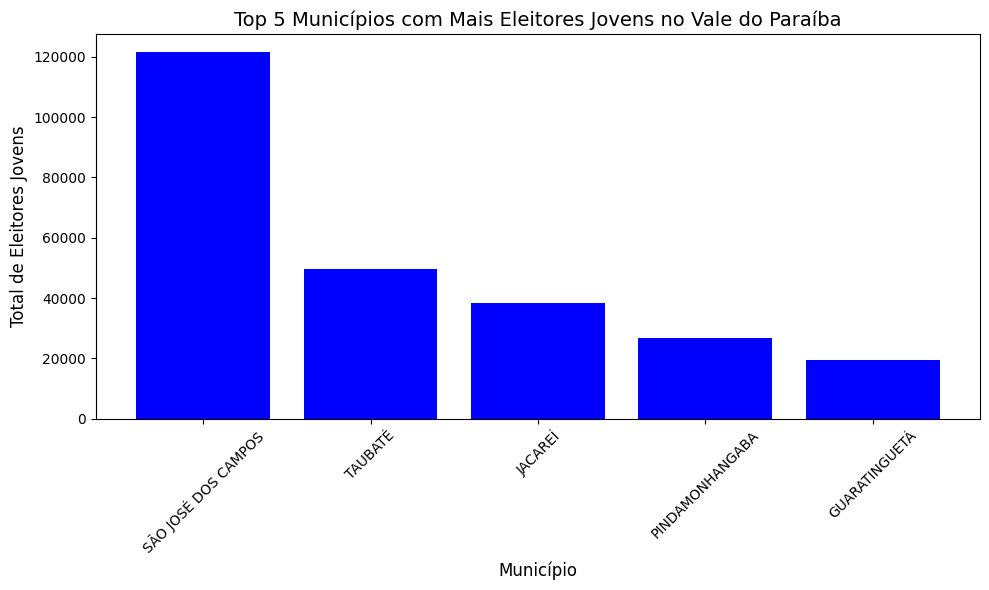

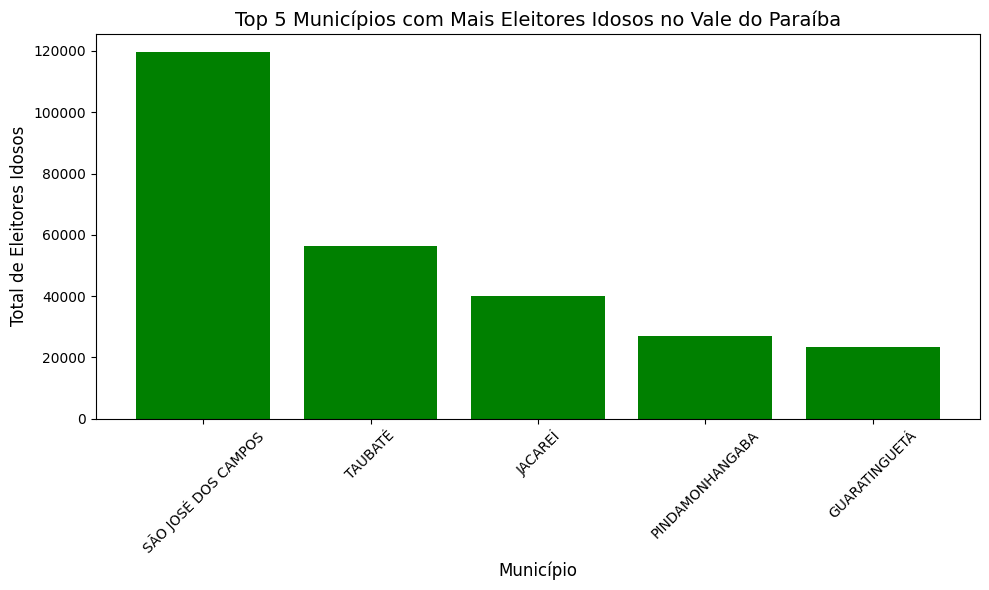

In [103]:
# Gráfico de comparação para os Top 5 municípios com mais eleitores jovens
plt.figure(figsize=(10, 6))
plt.bar(top_5_jovens['NM_MUNICIPIO'], top_5_jovens['QT_ELEITORES_PERFIL'], color='blue')
plt.title('Top 5 Municípios com Mais Eleitores Jovens no Vale do Paraíba', fontsize=14)
plt.xlabel('Município', fontsize=12)
plt.ylabel('Total de Eleitores Jovens', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico de comparação para os Top 5 municípios com mais eleitores idosos
plt.figure(figsize=(10, 6))
plt.bar(top_5_idosos['NM_MUNICIPIO'], top_5_idosos['QT_ELEITORES_PERFIL'], color='green')
plt.title('Top 5 Municípios com Mais Eleitores Idosos no Vale do Paraíba', fontsize=14)
plt.xlabel('Município', fontsize=12)
plt.ylabel('Total de Eleitores Idosos', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### *5. Jornalista quer comparar a renda média de eleitores do Vale do Paraíba com a de outras regiões do Estado*

Para comparar a **renda média** dos eleitores do **Vale do Paraíba** com a de outras regiões do estado de São Paulo, será preciso uma estratégia semelhante à usada anteriormente para estimar a renda com base no nível de escolaridade, uma vez que os datasets não contêm informações diretas sobre renda.

#### Etapas da Análise:

- **Identificar as cidades do Vale do Paraíba**: Relação já feita a partir dos datasets `df_eleitor_vale` e `df_bweb_vale`.

- **Estimar a renda média baseada no grau de escolaridade**: Será usado novamente a estratégia de mapear os níveis de escolaridade para valores estimados de renda.

- Comparar a renda média estimada do Vale do Paraíba com as demais regiões do estado de São Paulo (*na realidade, em comparação com o restante do Estado*)


In [117]:
# Adicionando a coluna de renda estimada ao DataFrame do eleitorado do vale e do estado de SP
df_eleitor_vale.loc[:, 'RENDA_ESTIMADA'] = df_eleitor_vale['DS_GRAU_ESCOLARIDADE'].map(renda_por_escolaridade)
df_eleitor_sp.loc[:, 'RENDA_ESTIMADA'] = df_eleitor_sp['DS_GRAU_ESCOLARIDADE'].map(renda_por_escolaridade)

# Filtrando e Dropando eleitores do Vale do Paraíba no Dataframe do estado de SP
eleitorado_restante_sp = df_eleitor_sp[~df_eleitor_sp['NM_MUNICIPIO'].isin(municipios_vale)]

# Calculando a renda média do Vale do Paraíba
renda_media_vale = (df_eleitor_vale['RENDA_ESTIMADA'] * df_eleitor_vale['QT_ELEITORES_PERFIL']).sum() / df_eleitor_vale['QT_ELEITORES_PERFIL'].sum()

# Calculando a renda média do restante do Estado de São Paulo
renda_media_restante_sp = (eleitorado_restante_sp['RENDA_ESTIMADA'] * eleitorado_restante_sp['QT_ELEITORES_PERFIL']).sum() / eleitorado_restante_sp['QT_ELEITORES_PERFIL'].sum()

# Exibindo as rendas médias
print(f"Renda média estimada dos eleitores do Vale do Paraíba: R$ {renda_media_vale:.2f}")
print(f"Renda média estimada dos eleitores do restante do Estado de São Paulo: R$ {renda_media_restante_sp:.2f}")

Renda média estimada dos eleitores do Vale do Paraíba: R$ 2536.73
Renda média estimada dos eleitores do restante do Estado de São Paulo: R$ 2410.07


- **Cálculo da renda média**: Foi feito o cálculo da média ponderada da renda estimada para ambos os grupos (Vale do Paraíba e outras regiões do Estado), considerando o número de eleitores em cada grupo de escolaridade.

- **Resultado**: Por fim, o código exibe a renda média estimada dos eleitores do Vale do Paraíba e a renda média do restante do estado.


#### Insights

- Agora, será gerado um gráfico de barras comparando as duas regiões (**Vale do Paraíba** e o restante do **Estado de São Paulo**)

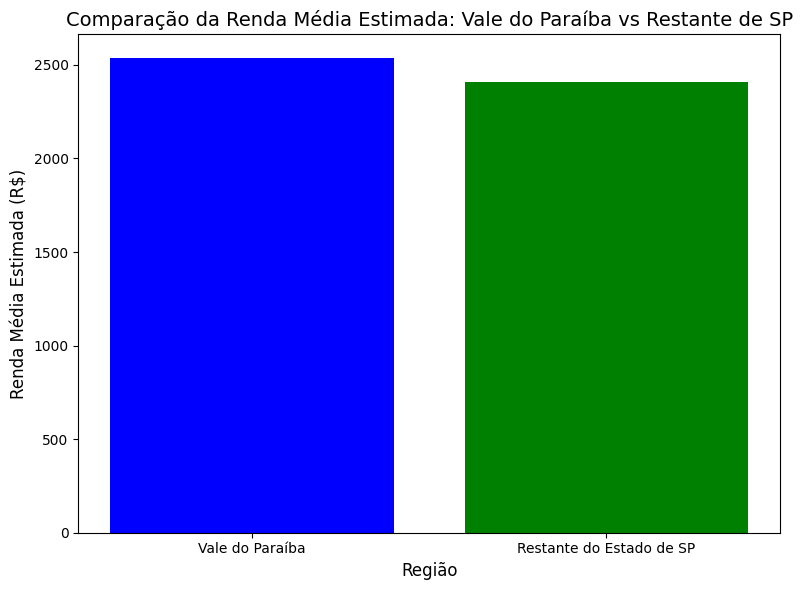

In [119]:
# Dados para o gráfico
rendas = [renda_media_vale, renda_media_restante_sp]
regioes = ['Vale do Paraíba', 'Restante do Estado de SP']

# Gerando o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(regioes, rendas, color=['blue', 'green'])
plt.title('Comparação da Renda Média Estimada: Vale do Paraíba vs Restante de SP', fontsize=14)
plt.ylabel('Renda Média Estimada (R$)', fontsize=12)
plt.xlabel('Região', fontsize=12)
plt.tight_layout()
plt.show()

### *6. Jornalista quer automatizar a exportação das estatísticas*

Para automatizar a exportação das estatísticas geradas, pode ser utilizado a função `to_csv()` do pandas para salvar os resultados das análises em arquivos CSV.


In [120]:
# 1. Classificação do eleitorado de SJC por estado civil, escolaridade e faixa etária
agrupamento_eleitorado = df_eleitor_sjc.groupby(['DS_ESTADO_CIVIL', 'DS_GRAU_ESCOLARIDADE', 'DS_FAIXA_ETARIA'])['QT_ELEITORES_PERFIL'].sum().reset_index()

# Exportando para CSV
agrupamento_eleitorado.to_csv('classificacao_eleitorado_sjc.csv', index=False)
print("Estatísticas de classificação do eleitorado exportadas para 'classificacao_eleitorado_sjc.csv'")

# 2. Renda média estimada para o Vale do Paraíba e restante de SP
renda_media_vale = (df_eleitor_vale['RENDA_ESTIMADA'] * df_eleitor_vale['QT_ELEITORES_PERFIL']).sum() / df_eleitor_vale['QT_ELEITORES_PERFIL'].sum()
renda_media_restante_sp = (eleitorado_restante_sp['RENDA_ESTIMADA'] * eleitorado_restante_sp['QT_ELEITORES_PERFIL']).sum() / eleitorado_restante_sp['QT_ELEITORES_PERFIL'].sum()

# Criando um DataFrame para armazenar essas estatísticas
renda_estimada = pd.DataFrame({
    'Região': ['Vale do Paraíba', 'Restante do Estado de SP'],
    'Renda Média Estimada': [renda_media_vale, renda_media_restante_sp]
})

# Exportando para CSV
renda_estimada.to_csv('renda_media_estimada.csv', index=False)
print("Estatísticas de renda média exportadas para 'renda_media_estimada.csv'")

# 3. Número de eleitores jovens e idosos por município (no Vale do Paraíba)

# Filtrando e agrupando jovens por município
eleitores_jovens = df_eleitor_vale[df_eleitor_vale['DS_FAIXA_ETARIA'].isin(faixas_jovens)]
eleitores_jovens_por_municipio = eleitores_jovens.groupby('NM_MUNICIPIO')['QT_ELEITORES_PERFIL'].sum().reset_index()

# Filtrando e agrupando idosos por município
eleitores_idosos = df_eleitor_vale[df_eleitor_vale['DS_FAIXA_ETARIA'].isin(faixas_idosos)]
eleitores_idosos_por_municipio = eleitores_idosos.groupby('NM_MUNICIPIO')['QT_ELEITORES_PERFIL'].sum().reset_index()

# Exportando para CSV
eleitores_jovens_por_municipio.to_csv('eleitores_jovens_por_municipio_vale.csv', index=False)
eleitores_idosos_por_municipio.to_csv('eleitores_idosos_por_municipio_vale.csv', index=False)

print("Estatísticas de eleitores jovens e idosos no Vale do Paraíba exportadas para 'eleitores_jovens_por_municipio_vale.csv' e 'eleitores_idosos_por_municipio_vale.csv'")

Estatísticas de classificação do eleitorado exportadas para 'classificacao_eleitorado_sjc.csv'
Estatísticas de renda média exportadas para 'renda_media_estimada.csv'
Estatísticas de eleitores jovens e idosos no Vale do Paraíba exportadas para 'eleitores_jovens_por_municipio_vale.csv' e 'eleitores_idosos_por_municipio_vale.csv'


- **Exportando o agrupamento do eleitorado**: Foi salvo a classificação do eleitorado de SJC por estado civil, escolaridade e faixa etária no arquivo `classificacao_eleitorado_sjc.csv`.

- **Exportando a renda média**: Foi calculado a renda média estimada do Vale do Paraíba e do restante do estado de São Paulo e salvo no arquivo `renda_media_estimada.csv`.

- **Exportando o número de eleitores jovens e idosos por município**: Foi filtrado os eleitores jovens e idosos nos municípios do Vale do Paraíba e salvado os resultados em `eleitores_jovens_por_municipio_vale.csv` e `eleitores_idosos_por_municipio_vale.csv`.


### *7. Jornalista quer poder relacionar características do eleitorado de acordo com o representante eleito em determinada região de eleições futuras*

Para permitir que o jornalista relacione as características do eleitorado com o representante eleito em eleições futuras, pode ser criado um fluxo automatizado e adaptável. Isso permitirá o uso dos mesmos passos com novos dados de futuras eleições, de forma flexível.

Para que o jornalista possa aplicar a análise para diferentes eleições no futuro:

1. **Importar os dados das futuras eleições**: Garantir que os dados de eleição (boletins de urna) e os dados do perfil do eleitorado estejam no formato adequado.

2. **Filtrar os dados relevantes**: Filtrar por município ou região desejada e o cargo específico.

3. **Relacionar as características do eleitorado com os resultados eleitorais**: Agrupar e comparar as características demográficas com os votos recebidos por cada candidato.

In [154]:
from pandas import DataFrame

class Eleicao:
    def __init__(self, cargo, municipio, turno, ano):
        self.cargo = cargo
        self.municipio = municipio
        self.turno = turno
        self.ano = ano

    def set_cargo(self, cargo):
        self.cargo = cargo

    def get_cargo(self):
        return self.cargo
    
    def set_municipio(self, municipio):
        self.municipio = municipio

    def get_municipio(self):
        return self.municipio
    
    def set_turno(self, turno):
        self.turno = turno

    def get_turno(self):
        return self.turno
    
    def set_ano(self, ano):
        self.ano = ano

    def get_ano(self):
        return self.ano


def carregar_dados_eleicao(caminho_perfil_eleitorado: str, caminho_boletim_urna: str, turno: bool = False) -> tuple[DataFrame, DataFrame]:
    """
    Função para carregar os dados do boletim de urna e perfil do eleitorado. Inserir o turno é opcional.
    """
    df_eleitorado = pd.read_csv(
        caminho_perfil_eleitorado, 
        usecols='''NR_ZONA NR_SECAO NM_MUNICIPIO DS_FAIXA_ETARIA DS_ESTADO_CIVIL DS_GRAU_ESCOLARIDADE 
        QT_ELEITORES_INC_NM_SOCIAL QT_ELEITORES_PERFIL'''.split(),
        sep=";", on_bad_lines = 'skip', encoding='Latin 1'
    )
    
    df_boletim_urna = pd.read_csv(
        caminho_boletim_urna, 
        usecols=f'''{"NR_TURNO" if turno else ""} NR_ZONA NR_SECAO NM_MUNICIPIO QT_COMPARECIMENTO QT_APTOS QT_COMPARECIMENTO QT_ABSTENCOES NR_VOTAVEL NM_VOTAVEL QT_VOTOS DS_CARGO_PERGUNTA'''.split(),
        sep=";", on_bad_lines = 'skip', encoding='Latin 1'
    )
    
    return df_eleitorado, df_boletim_urna

def filtrar_por_cargo(df_boletim_urna: DataFrame, df_eleitorado: DataFrame, cargo: str, municipio: str = None) -> tuple[DataFrame, DataFrame]:
    """
    Filtra os dados do boletim de urna e perfil do eleitorado para um cargo específico e um município (opcional).
    """
    if municipio:
        df_boletim_urna_filtrado = df_boletim_urna[(df_boletim_urna['DS_CARGO_PERGUNTA'] == cargo) & 
                                      (df_boletim_urna['NM_MUNICIPIO'] == municipio)]
        df_eleitorado_filtrado = df_eleitorado[df_eleitorado['NM_MUNICIPIO'] == municipio]

        return df_boletim_urna_filtrado, df_eleitorado_filtrado
    
    else:
        df_boletim_urna_filtrado = df_boletim_urna[df_boletim_urna['DS_CARGO_PERGUNTA'] == cargo]
        
        return df_boletim_urna_filtrado, df_eleitorado

def agrupar_votos_por_candidato(df_filtrado: DataFrame) -> DataFrame:
    """
    Agrupa os votos por candidato e turno (condicionado).
    """
    if 'NR_TURNO' in df_filtrado.columns: 
        votos_por_candidato = df_filtrado.groupby(['NR_TURNO', 'NM_VOTAVEL'])['QT_VOTOS'].sum().reset_index()
    else:
        votos_por_candidato = df_filtrado.groupby(['NM_VOTAVEL'])['QT_VOTOS'].sum().reset_index()

    return votos_por_candidato

def relacionar_eleitorado_com_candidatos(df_eleitorado: DataFrame, df_boletim_urna_filtrado: DataFrame) -> tuple[DataFrame, DataFrame]:
    """
    Relaciona as características do eleitorado (escolaridade, estado civil, faixa etária) com os candidatos eleitos.
    """
    # Agrupando o eleitorado por características
    agrupamento_eleitorado = df_eleitorado.groupby(['DS_ESTADO_CIVIL', 'DS_GRAU_ESCOLARIDADE', 'DS_FAIXA_ETARIA'])['QT_ELEITORES_PERFIL'].sum().reset_index()

    # Agrupando os votos por candidato
    votos_por_candidato = agrupar_votos_por_candidato(df_boletim_urna_filtrado)
    
    # Relacionando o eleitorado com os resultados
    return agrupamento_eleitorado, votos_por_candidato

- **Entrada flexível**: O caminho para os arquivos CSV de boletim de urna e perfil do eleitorado pode ser modificado para qualquer nova eleição.

- **Filtro por cargo e município**: A função `filtrar_por_cargo` permite que o jornalista filtre os resultados para qualquer cargo de eleição (como presidente, governador, prefeito) e para qualquer município ou região.

- **Relacionamento com características do eleitorado**: A função `relacionar_eleitorado_com_candidatos` faz o agrupamento das características do eleitorado e relaciona com os candidatos votados.

- **Automatizando a Exportação**: Para cada eleição futura, as estatísticas podem ser automaticamente exportadas usando a função `to_csv()`, para gerar relatórios comparáveis.


#### Como usar?

- Para futuras eleições, basta modificar os arquivos CSV de entrada (boletim de urna e perfil do eleitorado), e o código automaticamente relacionará os votos do representante eleito com as características do eleitorado naquela região.


#### Exemplo de Uso

- Para testar as funções criadas, será utilizado os dados do **primeiro turno das eleições municipais de 2024**, simulando assim a execução.

In [155]:
# Exemplo de uso para uma "eleição futura" (1º Turno 2024 SP)

# Carregar os dados do boletim de urna e do perfil do eleitorado para uma "futura eleição"
df_eleitorado, df_boletim_urna = carregar_dados_eleicao(
    r"C:\Users\felip\OneDrive\Documentos\NoSQL\~API\datasets-masanori\perfil_eleitor_secao_2024_SP\perfil_eleitor_secao_2024_SP.csv", 
    r'C:\Users\felip\OneDrive\Documentos\NoSQL\~API\datasets-masanori\bweb_1t_SP_091020241636_2024\bweb_1t_SP_091020241636.csv'
)

# Filtrar por cargo e município
eleicao = Eleicao(cargo='Prefeito', municipio='SÃO JOSÉ DOS CAMPOS', turno='1º TURNO', ano='2024')
df_boletim_urna, df_eleitorado = filtrar_por_cargo(df_boletim_urna, df_eleitorado, eleicao.get_cargo(), eleicao.get_municipio())

# Relacionar as características do eleitorado com os resultados dos candidatos
agrupamento_eleitorado, votos_por_candidato = relacionar_eleitorado_com_candidatos(df_eleitorado, df_boletim_urna)

# Exibir os resultados
print(f"Agrupamento das características do eleitorado em {eleicao.get_municipio()} no ano de {eleicao.get_ano()}:")
display(agrupamento_eleitorado)

print(f"Votos por candidato a {eleicao.get_cargo()} em {eleicao.get_municipio()}, {eleicao.get_turno()} de {eleicao.get_ano()}:")
display(votos_por_candidato)

Agrupamento das características do eleitorado em SÃO JOSÉ DOS CAMPOS no ano de 2024:


,DS_ESTADO_CIVIL,DS_GRAU_ESCOLARIDADE,DS_FAIXA_ETARIA,QT_ELEITORES_PERFIL
0,CASADO,ANALFABETO,25 a 29 anos,2
1,CASADO,ANALFABETO,30 a 34 anos,7
2,CASADO,ANALFABETO,35 a 39 anos,5
3,CASADO,ANALFABETO,40 a 44 anos,23
4,CASADO,ANALFABETO,45 a 49 anos,43
...,...,...,...,...
631,VIÚVO,SUPERIOR INCOMPLETO,70 a 74 anos,81
632,VIÚVO,SUPERIOR INCOMPLETO,75 a 79 anos,40
633,VIÚVO,SUPERIOR INCOMPLETO,80 a 84 anos,15
634,VIÚVO,SUPERIOR INCOMPLETO,85 a 89 anos,4


Votos por candidato a Prefeito em SÃO JOSÉ DOS CAMPOS, 1º TURNO de 2024:


,NM_VOTAVEL,QT_VOTOS
0,ANDERSON,145061
1,Branco,18545
2,DR ELTON,72745
3,EDUARDO CURY,94947
4,Nulo,19651
5,PROF WILSON CABRAL,8710
6,TONINHO FERREIRA,1659
7,WAGNER BALIEIRO,42679


#### Insights

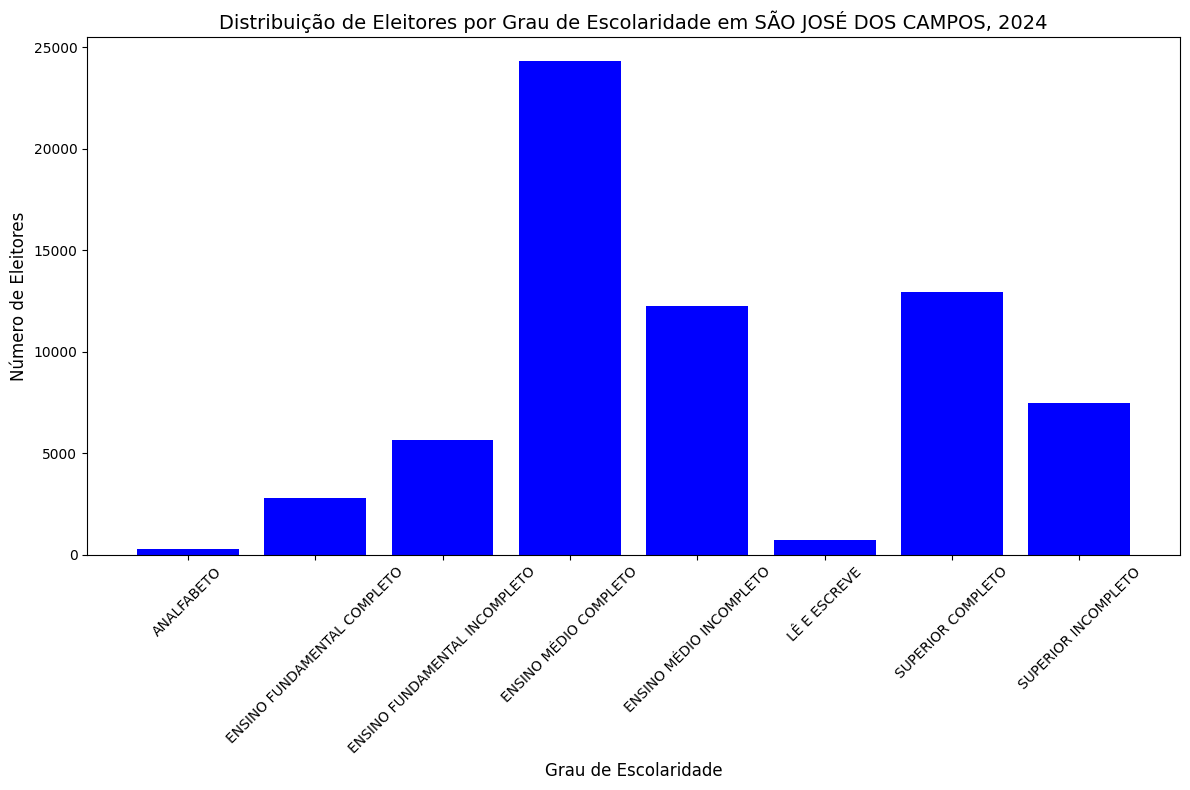

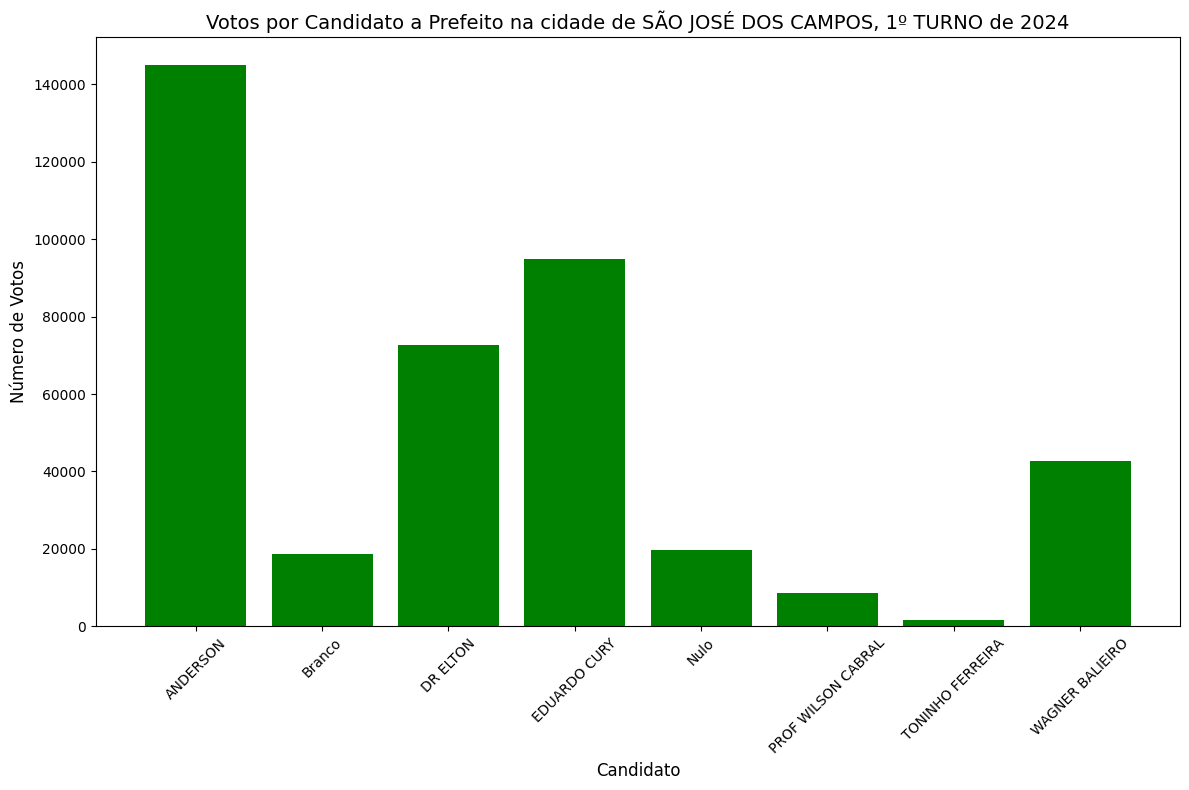

In [156]:
import matplotlib.ticker as mtick

# Agrupando por características do eleitorado e somando o número de eleitores
agrupamento_eleitorado_plot = agrupamento_eleitorado.groupby(['DS_ESTADO_CIVIL', 'DS_GRAU_ESCOLARIDADE', 'DS_FAIXA_ETARIA'])['QT_ELEITORES_PERFIL'].sum().reset_index()

# Gráfico de barras para as características demográficas
plt.figure(figsize=(12, 8))
plt.bar(agrupamento_eleitorado_plot['DS_GRAU_ESCOLARIDADE'], agrupamento_eleitorado_plot['QT_ELEITORES_PERFIL'], color='blue')

# Removendo notação científica do eixo Y
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:.0f}'))

plt.title(f'Distribuição de Eleitores por Grau de Escolaridade em {eleicao.get_municipio()}, {eleicao.get_ano()}', fontsize=14)
plt.xlabel('Grau de Escolaridade', fontsize=12)
plt.ylabel('Número de Eleitores', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico de barras para votos por candidato
plt.figure(figsize=(12, 8))
plt.bar(votos_por_candidato['NM_VOTAVEL'], votos_por_candidato['QT_VOTOS'], color='green')
plt.title(f'Votos por Candidato a {eleicao.get_cargo()} na cidade de {eleicao.get_municipio()}, {eleicao.get_turno()} de {eleicao.get_ano()}', fontsize=14)
plt.xlabel('Candidato', fontsize=12)
plt.ylabel('Número de Votos', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### *8. Jornalista quer saber a porcentagem de eleitores ausentes na última eleição*

Para calcular a **porcentagem de eleitores ausentes** na última eleição, será utilizado as informações de **quantidade de eleitores aptos** e **quantidade de eleitores que compareceram** disponíveis no dataset de **Boletim de Urna** específico para a cidade de **São José dos Campos** (`df_bweb_sjc`).

#### Colunas relevantes:

- **QT_APTOS**: Quantidade de eleitores aptos a votar.

- **QT_COMPARECIMENTO**: Quantidade de eleitores que compareceram às eleições.

A partir dessas colunas, pode ser calculado a quantidade de **ausentes** subtraindo os eleitores que compareceram do total de eleitores aptos. Em seguida, pode ser calculado a **porcentagem de eleitores ausentes**.

In [121]:
# Total de eleitores aptos em SJC
total_eleitores_aptos = df_bweb_sjc['QT_APTOS'].sum()

# Total de eleitores que compareceram em SJC
total_comparecimento = df_bweb_sjc['QT_COMPARECIMENTO'].sum()

# Calculando o número de eleitores ausentes em SJC
total_ausentes = total_eleitores_aptos - total_comparecimento

# Calculando a porcentagem de eleitores ausentes em SJC
porcentagem_ausentes = (total_ausentes / total_eleitores_aptos) * 100

print(f"Porcentagem de eleitores ausentes em São José dos Campos no 1º Turno de 2022: {porcentagem_ausentes:.2f}%")

Porcentagem de eleitores ausentes em São José dos Campos no 1º Turno de 2022: 19.83%


- **Total de eleitores aptos em SJC**: Soma da coluna `QT_APTOS`.

- **Total de comparecimento em SJC**: Soma da coluna `QT_COMPARECIMENTO`.

- **Eleitores ausentes em SJC**: Calculado como a diferença entre o total de eleitores aptos e o número de eleitores que compareceram.

- **Porcentagem de ausentes em SJC**: A porcentagem de eleitores ausentes calculada dividindo o número de ausentes pelo total de eleitores aptos e multiplicando por 100.

#### Insights

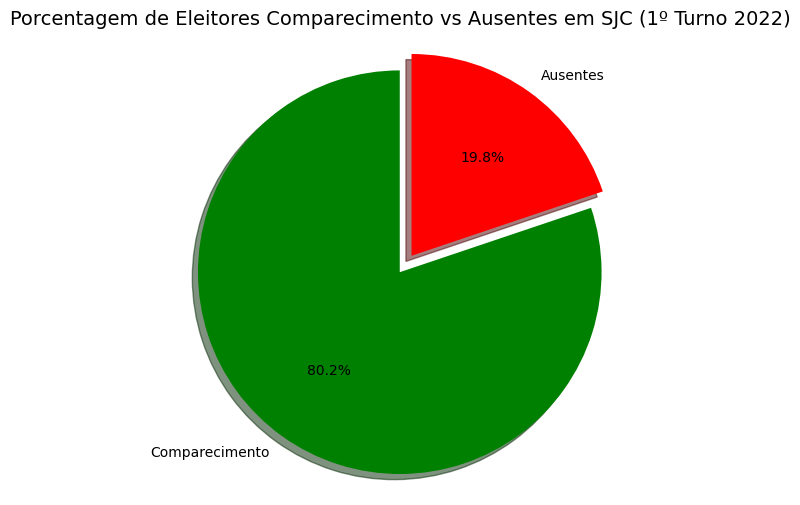

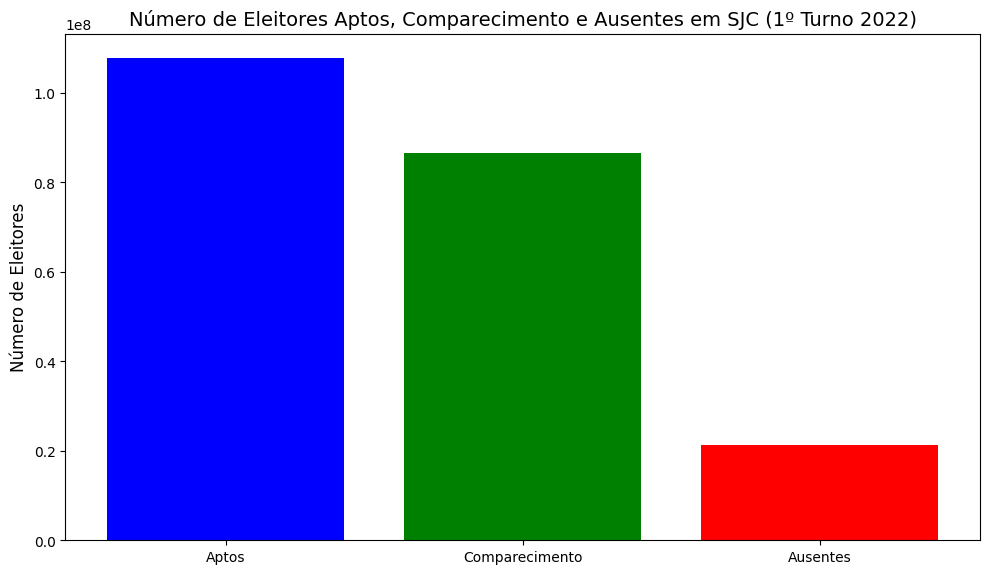

In [124]:
# Dados para o Pie Chart
labels = ['Comparecimento', 'Ausentes']
sizes = [total_comparecimento, total_ausentes]
colors = ['green', 'red']
explode = (0, 0.1)

# Criando o gráfico que mostra a proporção de eleitores que compareceram versus os ausentes em SJC
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Porcentagem de Eleitores Comparecimento vs Ausentes em SJC (1º Turno 2022)', fontsize=14)
plt.axis('equal')
plt.show()

# Dados para o gráfico de barras
categorias = ['Aptos', 'Comparecimento', 'Ausentes']
valores = [total_eleitores_aptos, total_comparecimento, total_ausentes]

# Criando o gráfico que compara os números absolutos de eleitores aptos, comparecimento e ausentes
plt.figure(figsize=(10, 6))
plt.bar(categorias, valores, color=['blue', 'green', 'red'])
plt.title('Número de Eleitores Aptos, Comparecimento e Ausentes em SJC (1º Turno 2022)', fontsize=14)
plt.ylabel('Número de Eleitores', fontsize=12)
plt.tight_layout()
plt.show()

### *9. Jornalista quer saber a evolução do número de eleitores*

Para responder à pergunta, é preciso os dados históricos de **perfil do eleitorado** ao longo de diferentes eleições. Com base nesses dados, podemos calcular o número total de eleitores em cada ano ou ciclo eleitoral e, em seguida, visualizar a evolução.

#### Para realizar a análise:

- **Dados históricos**: Obter os dados de perfil do eleitorado para diferentes anos, contendo a quantidade de eleitores aptos (`QT_ELEITORES_PERFIL`) e a data de referência de cada eleição *(Para criar a série histórica, foi adicionado os datasets das eleições de **2014** e **2018**)*.

- **Agrupamento por ano**: Agrupar os dados por ano para calcular o número total de eleitores aptos em cada eleição.

- **Visualização da evolução**: Gerar um gráfico para mostrar a evolução do número de eleitores ao longo do tempo.


In [128]:
# Carregando Dataframes de 2014 e 2018
df_eleitor_sjc_2014 = pd.read_csv(r"C:\Users\felip\OneDrive\Documentos\NoSQL\~API\datasets-masanori\perfil_eleitor_secao_2014_SP\perfil_eleitor_secao_2014_SP.csv", 
                 usecols='''NM_MUNICIPIO QT_ELEITORES_PERFIL'''.split(),
                 sep=";", on_bad_lines = 'skip', encoding='Latin 1'
                )

df_eleitor_sjc_2014 = df_eleitor_sjc_2014.query('NM_MUNICIPIO == "SÃO JOSÉ DOS CAMPOS"')
df_eleitor_sjc_2014 = df_eleitor_sjc_2014.drop(columns = 'NM_MUNICIPIO')

df_eleitor_sjc_2018 = pd.read_csv(r"C:\Users\felip\OneDrive\Documentos\NoSQL\~API\datasets-masanori\perfil_eleitor_secao_2018_SP\perfil_eleitor_secao_2018_SP.csv", 
                 usecols='''NM_MUNICIPIO QT_ELEITORES_PERFIL'''.split(),
                 sep=";", on_bad_lines = 'skip', encoding='Latin 1'
                )

df_eleitor_sjc_2018 = df_eleitor_sjc_2018.query('NM_MUNICIPIO == "SÃO JOSÉ DOS CAMPOS"')
df_eleitor_sjc_2018 = df_eleitor_sjc_2018.drop(columns = 'NM_MUNICIPIO')

df_eleitor_sjc_2022 = pd.read_csv(r"C:\Users\felip\OneDrive\Documentos\NoSQL\~API\datasets-masanori\perfil_eleitor_secao_2022_SP\perfil_eleitor_secao_2022_SP.csv", 
                 usecols='''NM_MUNICIPIO QT_ELEITORES_PERFIL'''.split(),
                 sep=";", on_bad_lines = 'skip', encoding='Latin 1'
                )

df_eleitor_sjc_2022 = df_eleitor_sjc_2022.query('NM_MUNICIPIO == "SÃO JOSÉ DOS CAMPOS"')
df_eleitor_sjc_2022 = df_eleitor_sjc_2022.drop(columns = 'NM_MUNICIPIO')

# Adicionando a coluna de ano para cada DataFrame
df_eleitor_sjc_2014['ANO_ELEICAO'] = 2014
df_eleitor_sjc_2018['ANO_ELEICAO'] = 2018
df_eleitor_sjc_2022['ANO_ELEICAO'] = 2022

# Fazendo o merge dos DataFrames
df_perfil_eleitorado_historico = pd.concat([df_eleitor_sjc_2014, df_eleitor_sjc_2018, df_eleitor_sjc_2022])

# Agrupando os dados por ano de eleição e somando o número de eleitores
evolucao_eleitores = df_perfil_eleitorado_historico.groupby('ANO_ELEICAO')['QT_ELEITORES_PERFIL'].sum().reset_index()

# Exibindo a evolução do número de eleitores por ano
print("Evolução do número de eleitores por ano:")
display(evolucao_eleitores)

Evolução do número de eleitores por ano:


,ANO_ELEICAO,QT_ELEITORES_PERFIL
0,2014,474012
1,2018,508693
2,2022,558140


- **Agrupamento por ano**: Foi usada a coluna `ANO_ELEICAO` para agrupar os dados e somar a quantidade de eleitores aptos (`QT_ELEITORES_PERFIL`) para cada ano de eleição.


#### Insights

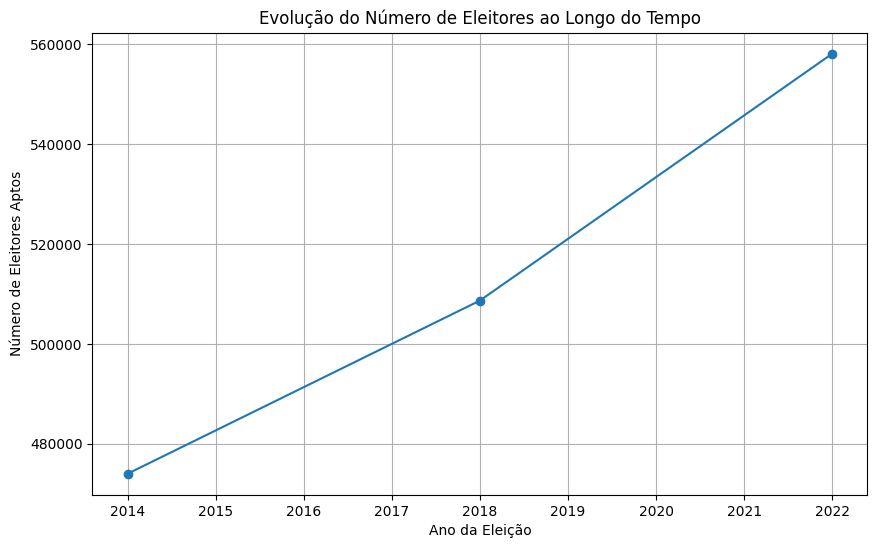

In [129]:
# Plotando a evolução do número de eleitores
plt.figure(figsize=(10,6))
plt.plot(evolucao_eleitores['ANO_ELEICAO'], evolucao_eleitores['QT_ELEITORES_PERFIL'], marker='o')
plt.title('Evolução do Número de Eleitores ao Longo do Tempo')
plt.xlabel('Ano da Eleição')
plt.ylabel('Número de Eleitores Aptos')
plt.grid(True)
plt.show()